In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson 

In [2]:
file = '../example_data/Recording Set 2024.01.29-10.41.03.CSV'

# Read experiment data
df = pd.read_csv(file, skiprows=[0,1]) # read, skip info rows


# Convert to datetime
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%b-%d-%Y %H:%M:%S.%f %p')

# Inspect data
df.head()

,Time Stamp,PC Capman Pressure,PC Source 2 Freq,PC Source 2 Q,PC Source 2 Rate,PC Source 4 Freq,PC Source 4 Q,PC Source 4 Rate,PC Source 6 Freq,PC Source 6 Q,PC Source 6 Rate,Power Supply 1 Power,Power Supply 1 Voltage,Power Supply 3 Power,Power Supply 3 Voltage,Power Supply 5 DC Bias,Power Supply 5 Fwd Power,PC High Vac Valve Position,PC MFC 1 Flow
0,2024-01-29 10:41:03.350,3.091478,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,3.664503,458.575562,14.950192,403.740784,70,35,55,52.278508
1,2024-01-29 10:41:03.458,3.076219,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.845823
2,2024-01-29 10:41:03.568,3.076219,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.845823
3,2024-01-29 10:41:03.677,3.060960,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.714321
4,2024-01-29 10:41:03.785,3.060960,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.714321


In [3]:
p1 = 'Power Supply 1 Voltage'
p2 = 'Power Supply 3 Voltage'
p3 = 'Power Supply 5 DC Bias'

ps = [p1,p2,p3]


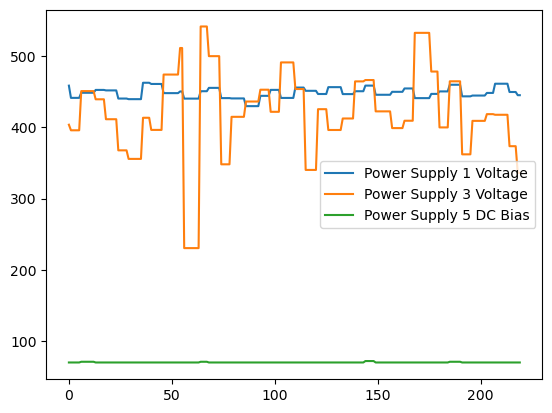

In [4]:
plotdf = df[ps]
plotdf.plot()
plt.show()

# Rolling std

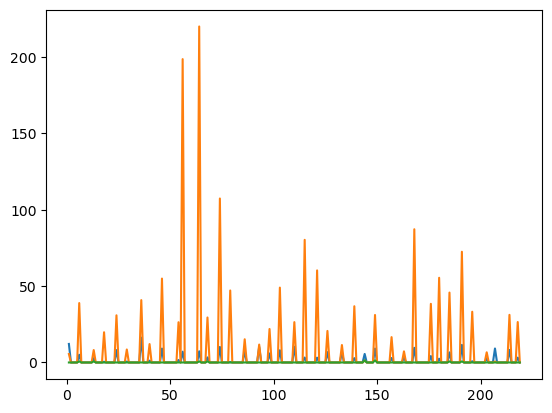

In [5]:
for p in ps:
    df[p].rolling(2).std().plot()

## Augmented Dickey-Fuller unit root test

### Doesn't seem to work, all three classified as stationary. Also, small differences in p-value.

In [6]:
for p in ps:
    
    print(p)
    
    print(adfuller(df[p]))

Power Supply 1 Voltage
(-5.241117370246814, 7.242577724925659e-06, 4, 215, {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}, 1142.4574124314702)
Power Supply 3 Voltage
(-3.9424808165681546, 0.0017435282955679204, 10, 209, {'1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647}, 2039.4451956388123)
Power Supply 5 DC Bias
(-4.8340349237895515, 4.679320550324208e-05, 5, 214, {'1%': -3.4612821203214907, '5%': -2.875142613826617, '10%': -2.574020122281422}, -29.586562833422192)


## KPSS test 

### Doesn't seem to work (https://statology.org/kpss-test-in-python/).

In [7]:
for p in ps:
    
    print(p)
    
    print(sm.tsa.stattools.kpss(df[p], regression='ct'))
    

plt.show()


Power Supply 1 Voltage
(0.0733051662863167, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
Power Supply 3 Voltage
(0.0592313460650454, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
Power Supply 5 DC Bias
(0.05852367169249, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/var/folders/z7/hhdyq2c544q40kc9g6q0kqd00000gn/T/ipykernel_3206/2695750822.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(sm.tsa.stattools.kpss(df[p], regression='ct'))
/var/folders/z7/hhdyq2c544q40kc9g6q0kqd00000gn/T/ipykernel_3206/2695750822.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(sm.tsa.stattools.kpss(df[p], regression='ct'))
/var/folders/z7/hhdyq2c544q40kc9g6q0kqd00000gn/T/ipykernel_3206/2695750822.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(sm.tsa.stattools.kpss(df[p], regression='ct'))


## Autocorrelation 

### Doesn't seem to work. Tried with different lags but it is hard to make a meaningful distinction for settled/not-settled experiments

Power Supply 1 Voltage
0.8390752821103445


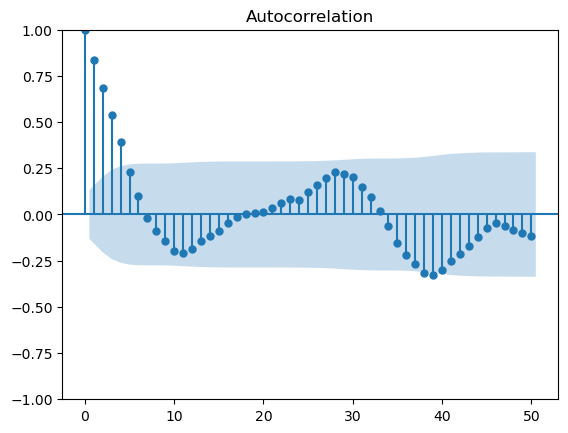

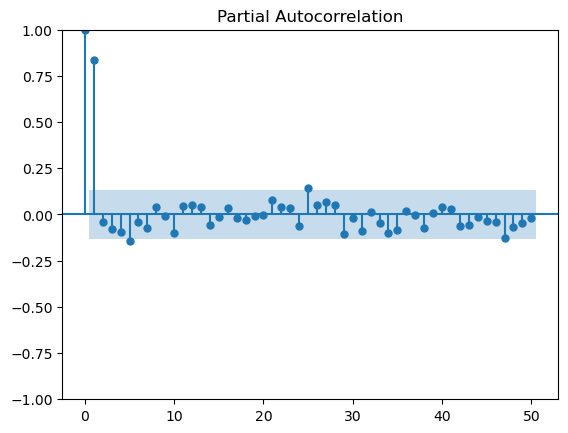

Power Supply 3 Voltage
0.809386374224236


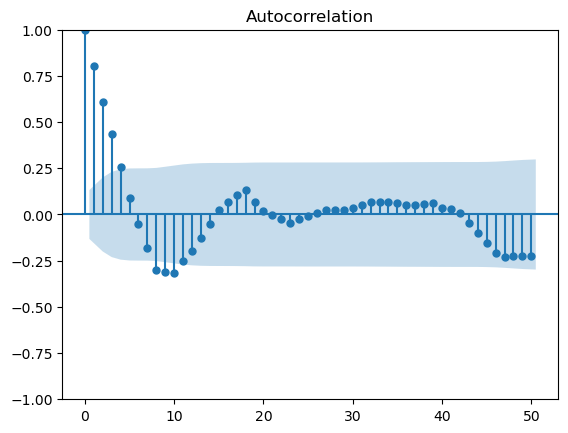

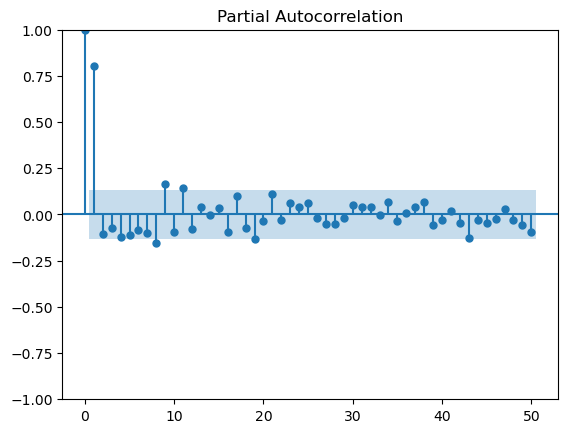

Power Supply 5 DC Bias
0.7921074043938146


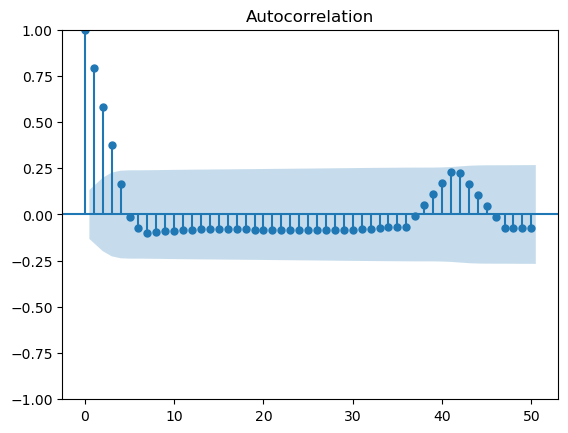

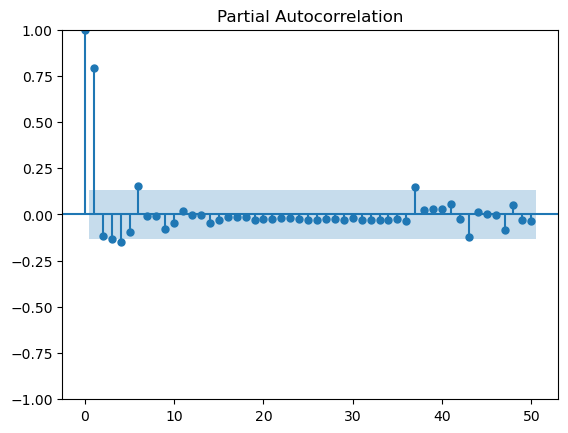

In [8]:
for p in ps:
    
    print(p)
    
    print(df[p].autocorr())
    
    plot_acf(df[p], lags=50)
    
    plot_pacf(df[p], lags=50)
    
    plt.show()


#plt.show()

# Comments on stationarity and autocorrelation

## Stationarity

Stationarity entails

1. constant mean;
2. constant variance;
3. and no trends

in the time-series. A non-settled experiment can be stationary (for example, consider the case of having constant large fluctuations over time) thus we cannot, to my understanding, frame the settled/non-settled question as a stationarity problem. We can however potentially add stationarity as a requirement for stability.

KPSS and unit-root tests are designed for checking stationarity in the time series.

## Autocorrelation

Autocorrelation is about detecting trends in the time-series (good video explaining this: https://www.youtube.com/watch?v=O9LdxmDwoS8). Since most of our experiments will be "flat" i.e., won't contain (upward/downward) trends, we will mostly end up with low autocorrelations. Yet again, I don't think this is the right framing of the problem, but I could be missing something.


# Autocovariance

The only more "sophisticated" measure that I found might work for the settled/not-settled question is autocovariance. A good article and video about it can be found here: https://dlsun.github.io/probability/cov-function.html. 

A very flat time-series will have close to zero autocovariance, whereas a high variance time-series will have high positive and negative autocovariances.

However, I don't think that one can consider this to be more rigorous than just checking standard deviation in the time-series, since we are virtually measuring the same thing, and again arrive at the problem of having to set user-defined thesholds to distinguish between settled/not-settled. 

In [9]:
import statsmodels.tsa.api as smt

In [10]:
for p in ps:
    print(p)
    print(smt.acovf(df[p])[:10])
    
    # Sum the absolute values of the covariances (lag: 10)
    print(np.sum(np.abs(smt.acovf(df[p])[:10])))

Power Supply 1 Voltage
[53.97817018 45.07200296 36.96118121 29.02149708 21.08181295 12.55017494
  5.4381779  -0.97697862 -4.90103628 -7.60655687]
217.5875889885499
Power Supply 3 Voltage
[ 3607.02558865  2905.87820597  2204.13994243  1564.3096485
   924.47935456   321.18762409  -194.7361544   -646.47861519
 -1088.60062985 -1120.94520488]
14577.780968521845
Power Supply 5 DC Bias
[ 0.15311983  0.12123319  0.08934654  0.0574599   0.02557325 -0.00176794
 -0.01092731 -0.01498338 -0.01449399 -0.0140046 ]
0.502909936138242
